## Problem - 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [19]:
def cdf(n_values, dist_type, mean=0, variance=1):
    plt.figure(figsize=(10, 5))

    for i, n in enumerate(n_values):
        if dist_type == "normal":
            X = np.random.normal(loc=mean, scale=np.sqrt(variance), size=(10000, n))
        elif dist_type == "lognormal":
            sigma = np.sqrt(np.log(variance / (mean ** 2) + 1))
            mu = np.log(mean) - sigma ** 2 / 2
            X = np.random.lognormal(mean=mu, sigma=sigma, size=(10000, n))

        Zn = (np.sum(X, axis=1) - n * mean) / (np.sqrt(n) * np.sqrt(variance))

        sorted_Zn = np.sort(Zn)
        cdf = np.arange(1, len(sorted_Zn) + 1) / len(sorted_Zn)
        plt.plot(sorted_Zn, cdf, label=f'n = {n}')

    plt.title(f'CDFs of Z_n for {dist_type.capitalize()} Distribution')
    plt.xlabel('Z_n')
    plt.ylabel('CDF')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

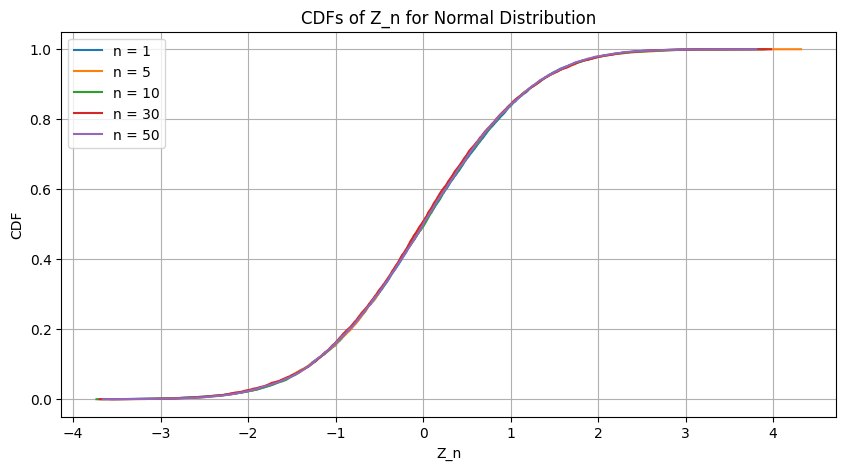

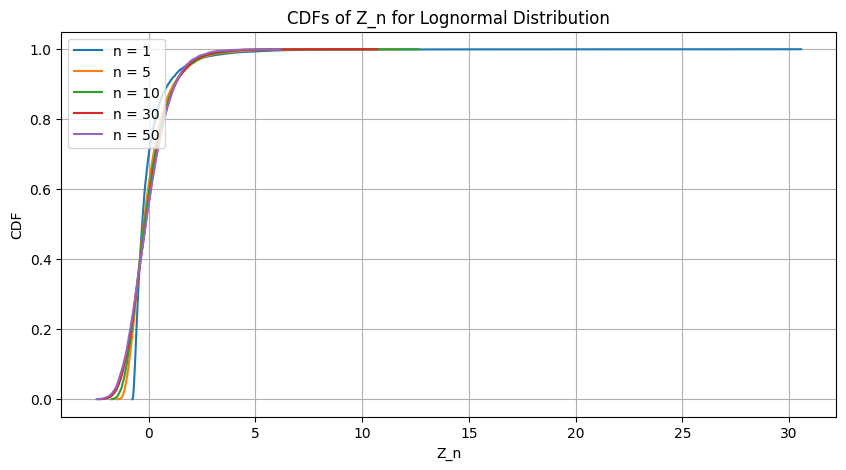

In [20]:
n_values = [1, 5, 10, 30, 50]
cdf(n_values, dist_type="normal", mean=0, variance=1)
cdf(n_values, dist_type="lognormal", mean=1, variance=np.exp(1) - 1)

## Problem - 7

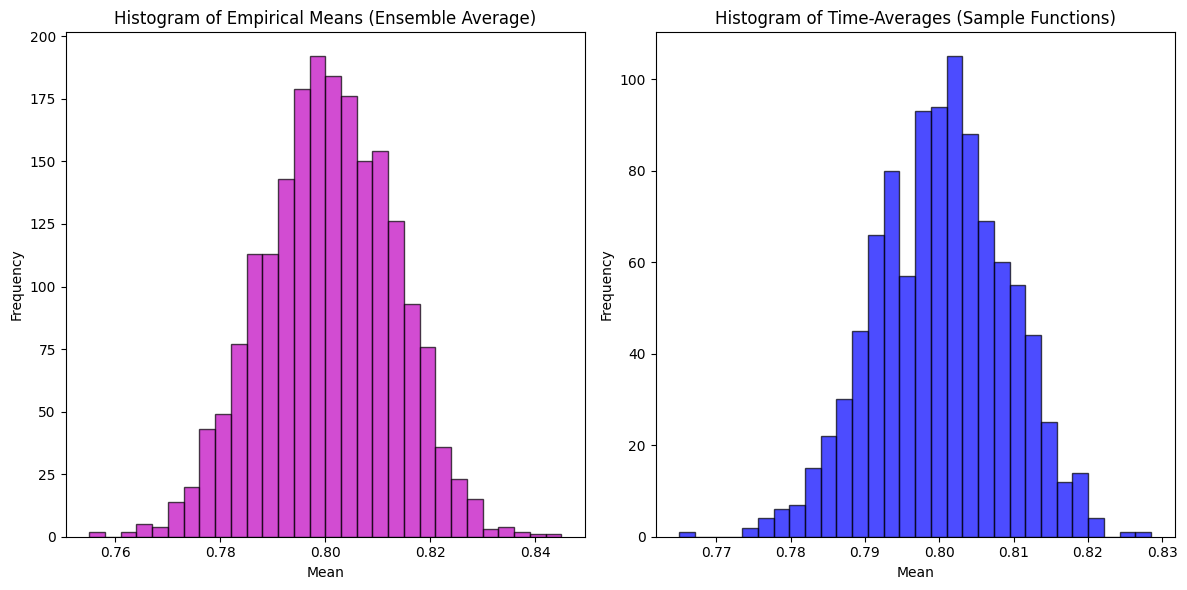

Mean of ensemble means: 0.8002, Std Dev: 0.0125
Mean of time-averages: 0.8002, Std Dev: 0.0088


In [25]:
import numpy as np
import matplotlib.pyplot as plt

n_sample_functions = 1000
n_time_steps = 2000
bernoulli_samples = np.random.binomial(1, 0.8, (n_sample_functions, n_time_steps))

ensemble_means = np.mean(bernoulli_samples, axis=0)

time_averages = np.mean(bernoulli_samples, axis=1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(ensemble_means, bins=30, color='m', alpha=0.7, edgecolor='black')
plt.title('Histogram of Empirical Means (Ensemble Average)')
plt.xlabel('Mean')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(time_averages, bins=30, color='b', alpha=0.7, edgecolor='black')
plt.title('Histogram of Time-Averages (Sample Functions)')
plt.xlabel('Mean')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



mean_ensemble = np.mean(ensemble_means)
mean_time_average = np.mean(time_averages)
std_ensemble = np.std(ensemble_means)
std_time_average = np.std(time_averages)

print(f"Mean of ensemble means: {mean_ensemble:.4f}, Std Dev: {std_ensemble:.4f}")
print(f"Mean of time-averages: {mean_time_average:.4f}, Std Dev: {std_time_average:.4f}")
